In [2]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

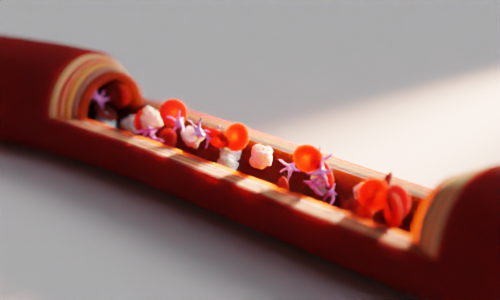

In [3]:
import bpy
from IPython.display import display, Image


def render_image(resx=200, resy = 100):
    path = "test.png"
    bpy.context.scene.cycles.samples = 30

    bpy.context.scene.render.resolution_x = resx
    bpy.context.scene.render.resolution_y = resy
    bpy.context.scene.render.image_settings.file_format = 'PNG'
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath=path)
    display(Image(filename=path, width=1000))

bpy.ops.wm.open_mainfile(filepath="blood_vessel.blend")
bpy.ops.object.geometry_nodes_move_to_nodes()
artery_object = bpy.data.objects['Artery']
group = artery_object.modifiers['Artery'].node_group.nodes['Group']
render_image(resx = 500, resy = 300)

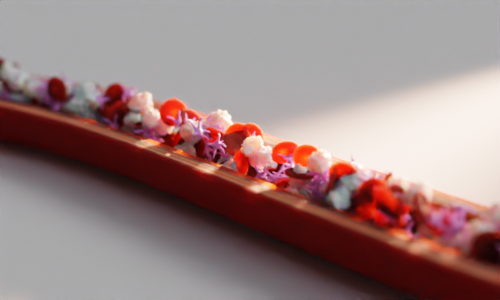

In [4]:
group.inputs['Cutaway start'].default_value = 0
group.inputs['Cutaway end'].default_value = 1
group.inputs['Element density'].default_value = 500
render_image(resx = 500, resy = 300)